<img src="https://upload.wikimedia.org/wikipedia/commons/7/7c/Kaggle_logo.png" alt="KAGGLE LOGO" />

# Speed Dating Experiment

## *What attributes influence the selection of a romantic partner?*

## Goals 🎯
* Do a descriptive analysis of the main factors that influence getting a second appointment

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import warnings

from plotly.subplots import make_subplots

warnings.filterwarnings("ignore")

### Import dataset

In [2]:
dataset = pd.read_csv("src/speed_dating_data.csv", encoding="ISO-8859-1")
pd.crosstab(index=dataset["match"], columns="count")

col_0,count
match,
0,6998
1,1380


#### **Question 1**

> - What are the least desirable attributes in a male partner? Does this differ for female partners?<br>
> - How important do people think attractiveness is in potential mate selection vs. its real impact?<br>

*Evaluation of attributes according to the TIME PERIODS (before & after the event) and QUESTIONS asked to the participants:*

> - Question 1: What are you looking for in the opposite sex?<br>
> - Question 4: What do you think most of your fellow (men/women) is looking for in the opposite sex?<br>
> - Question 2: What do you think the opposite sex is looking for in a date?<br>

In [3]:
# attribute evaluation function
def evalutation_attribut(df, time_period, question):
    attribut = ["attr", "sinc", "intel", "fun", "amb", "shar"]
    attribut_column = [col for col in dataset.columns if col.endswith(question+time_period)]
    attribut_column.insert(0, "iid")
    
    df = df[attribut_column]
    df.drop_duplicates(inplace=True)
    df.drop(["iid"], axis=1, inplace=True)
    
    attribut_mean = []
    for i in range(6):
        attribut_mean.append(df[attribut[i]+question+time_period].sum()/len(df))
    
    attribut_mean += attribut_mean[:1]
    return attribut_mean

# polar subplot function
def create_polar():
    fig = make_subplots(
        rows=3, cols=3,
        specs=[
            # [{"type": "polar", "t": 0.1}],
            [{"type": "polar"}, {"type": "polar"}, {"type": "polar"}],
            [{"type": "polar"}, {"type": "polar"}, {"type": "polar"}],
            [{"type": "polar"}, {"type": "polar"}, {"type": "polar"}]
        ],
        column_titles=["Matched", "Gender", "Gender/Matched"],
        row_titles=["Q1", "Q4", "Q2"],
        vertical_spacing=0.28/3,
        horizontal_spacing=0.25/3
    )
    
    for annotation in fig['layout']['annotations']:
        annotation['textangle']=0
    
    x = 0.02
    for i in range(3):
        fig['layout']['annotations'][i]['x'] = x
        fig['layout']['annotations'][i]['y'] = 0.98
        fig['layout']['annotations'][i]['font']['size'] = 18
        fig['layout']['annotations'][i+3]['x'] = 0
        x += 0.35
    
    fig.update_polars(
        radialaxis_range=list([0, 36]),
        radialaxis_angle=0,
        radialaxis_tickangle=0,
        radialaxis_nticks=4,
        angularaxis_direction="clockwise"
    )

    return fig

# preparing different dataset based on gender and/or match
match = dataset.loc[dataset["match"] == 1]

male = dataset.loc[dataset["gender"] == 1]
male_match = male.loc[male["match"] == 1]

female = dataset.loc[dataset["gender"] == 0]
female_match = female.loc[female["match"] == 1]

# scatterpolar graphic
attribut = ["Attractive", "Sincere", "Intelligent", "Fun", "Ambitious", "Interests"]
attribut += attribut[:1]

In [4]:
fig = create_polar()

fig.add_traces(
    [
        go.Scatterpolar(r=evalutation_attribut(match, "1", "1_"), theta=attribut, fill="toself", name="Match 11", mode="lines+markers"),
        go.Scatterpolar(r=evalutation_attribut(male, "1", "1_"), theta=attribut, fill="toself", name="Male 11", opacity=0.8, mode="lines+markers"),
        go.Scatterpolar(r=evalutation_attribut(male_match, "1", "1_"), theta=attribut, fill="toself", name="Male Match 11", opacity=0.8, mode="lines+markers"),
        
        go.Scatterpolar(r=evalutation_attribut(match, "1", "4_"), theta=attribut, fill="toself", name="Match 14", mode="lines+markers"),
        go.Scatterpolar(r=evalutation_attribut(male, "1", "4_"), theta=attribut, fill="toself", name="Male 14", opacity=0.8, mode="lines+markers"),
        go.Scatterpolar(r=evalutation_attribut(male_match, "1", "4_"), theta=attribut, fill="toself", name="Male Match 14", opacity=0.8, mode="lines+markers"),
        
        go.Scatterpolar(r=evalutation_attribut(match, "1", "2_"), theta=attribut, fill="toself", name="Match 12", mode="lines+markers"),
        go.Scatterpolar(r=evalutation_attribut(male, "1", "2_"), theta=attribut, fill="toself", name="Male 12", opacity=0.8, mode="lines+markers"),
        go.Scatterpolar(r=evalutation_attribut(male_match, "1", "2_"), theta=attribut, fill="toself", name="Male Match 12", opacity=0.8, mode="lines+markers")
    ],
    rows=[1, 1, 1, 2, 2, 2, 3, 3, 3], cols=[1, 2, 3, 1, 2, 3, 1, 2, 3]
)

fig.add_traces(
    [
        go.Scatterpolar(r=evalutation_attribut(female, "1", "1_"), theta=attribut, fill="toself", name="Female 11", opacity=1, mode="lines+markers"),
        go.Scatterpolar(r=evalutation_attribut(female_match, "1", "1_"), theta=attribut, fill="toself", name="Female Match 11", opacity=1, mode="lines+markers"),
        
        go.Scatterpolar(r=evalutation_attribut(female, "1", "4_"), theta=attribut, fill="toself", name="Female 14", opacity=1, mode="lines+markers"),
        go.Scatterpolar(r=evalutation_attribut(female_match, "1", "4_"), theta=attribut, fill="toself", name="Female Match 14", opacity=1, mode="lines+markers"),
        
        go.Scatterpolar(r=evalutation_attribut(female, "1", "2_"), theta=attribut, fill="toself", name="Female 12", opacity=1, mode="lines+markers"),
        go.Scatterpolar(r=evalutation_attribut(female_match, "1", "2_"), theta=attribut, fill="toself", name="Female Match 12", opacity=1, mode="lines+markers")
    ],
    rows=[1, 1, 2, 2, 3, 3], cols=[2, 3, 2, 3, 2, 3]
)

fig.update_layout(height=1000, showlegend=True, title="Before Event")

In [5]:
fig = create_polar()

fig.add_traces(
    [
        go.Scatterpolar(r=evalutation_attribut(match, "2", "1_"), theta=attribut, fill="toself", name="Match 11", mode="lines+markers"),
        go.Scatterpolar(r=evalutation_attribut(male, "2", "1_"), theta=attribut, fill="toself", name="Male 11", opacity=0.8, mode="lines+markers"),
        go.Scatterpolar(r=evalutation_attribut(male_match, "2", "1_"), theta=attribut, fill="toself", name="Male Match 11", opacity=0.8, mode="lines+markers"),
        
        go.Scatterpolar(r=evalutation_attribut(match, "2", "4_"), theta=attribut, fill="toself", name="Match 14", mode="lines+markers"),
        go.Scatterpolar(r=evalutation_attribut(male, "2", "4_"), theta=attribut, fill="toself", name="Male 14", opacity=0.8, mode="lines+markers"),
        go.Scatterpolar(r=evalutation_attribut(male_match, "2", "4_"), theta=attribut, fill="toself", name="Male Match 14", opacity=0.8, mode="lines+markers"),
        
        go.Scatterpolar(r=evalutation_attribut(match, "2", "2_"), theta=attribut, fill="toself", name="Match 12", mode="lines+markers"),
        go.Scatterpolar(r=evalutation_attribut(male, "2", "2_"), theta=attribut, fill="toself", name="Male 12", opacity=0.8, mode="lines+markers"),
        go.Scatterpolar(r=evalutation_attribut(male_match, "2", "2_"), theta=attribut, fill="toself", name="Male Match 12", opacity=0.8, mode="lines+markers")
    ],
    rows=[1, 1, 1, 2, 2, 2, 3, 3, 3], cols=[1, 2, 3, 1, 2, 3, 1, 2, 3]
)

fig.add_traces(
    [
        go.Scatterpolar(r=evalutation_attribut(female, "2", "1_"), theta=attribut, fill="toself", name="Female 11", opacity=1, mode="lines+markers"),
        go.Scatterpolar(r=evalutation_attribut(female_match, "2", "1_"), theta=attribut, fill="toself", name="Female Match 11", opacity=1, mode="lines+markers"),
        
        go.Scatterpolar(r=evalutation_attribut(female, "2", "4_"), theta=attribut, fill="toself", name="Female 14", opacity=1, mode="lines+markers"),
        go.Scatterpolar(r=evalutation_attribut(female_match, "2", "4_"), theta=attribut, fill="toself", name="Female Match 14", opacity=1, mode="lines+markers"),
        
        go.Scatterpolar(r=evalutation_attribut(female, "2", "2_"), theta=attribut, fill="toself", name="Female 12", opacity=1, mode="lines+markers"),
        go.Scatterpolar(r=evalutation_attribut(female_match, "2", "2_"), theta=attribut, fill="toself", name="Female Match 12", opacity=1, mode="lines+markers")
    ],
    rows=[1, 1, 2, 2, 3, 3], cols=[2, 3, 2, 3, 2, 3]
)

fig.update_layout(height=1000, showlegend=True, title="After Event")

#### **Question 2**

> - Does correlation between participant’s and partner’s ratings of interests has an impact on getting a second date?<br>

*Evaluation of the variable **int_corr**:*

> - int_corr: correlation between participant’s and partner’s ratings of interests in Time 1<br>

In [6]:
df = pd.DataFrame(columns=["id", "int_corr_ok", "int_corr_nok"])

for i in range(len(dataset)):
    df_match_ok = dataset.loc[dataset["match"] == 1, :]
    df_match_nok = dataset.loc[dataset["match"] == 0, :]
    
    df_match_ok = df_match_ok.loc[df_match_ok["iid"] == i+1, :]
    df_match_nok = df_match_nok.loc[df_match_nok["iid"] == i+1, :]
    
    df_match_ok = df_match_ok[["int_corr"]]
    df_match_nok = df_match_nok[["int_corr"]]
    
    int_corr_ok = df_match_ok.int_corr.abs().mean()
    int_corr_nok = df_match_nok.int_corr.abs().mean()
    
    df_new_row = pd.DataFrame(data=np.array([[i+1, int_corr_ok, int_corr_nok]]), columns=df.columns)
    df = pd.concat([df, df_new_row], ignore_index=True)

df = df.dropna()

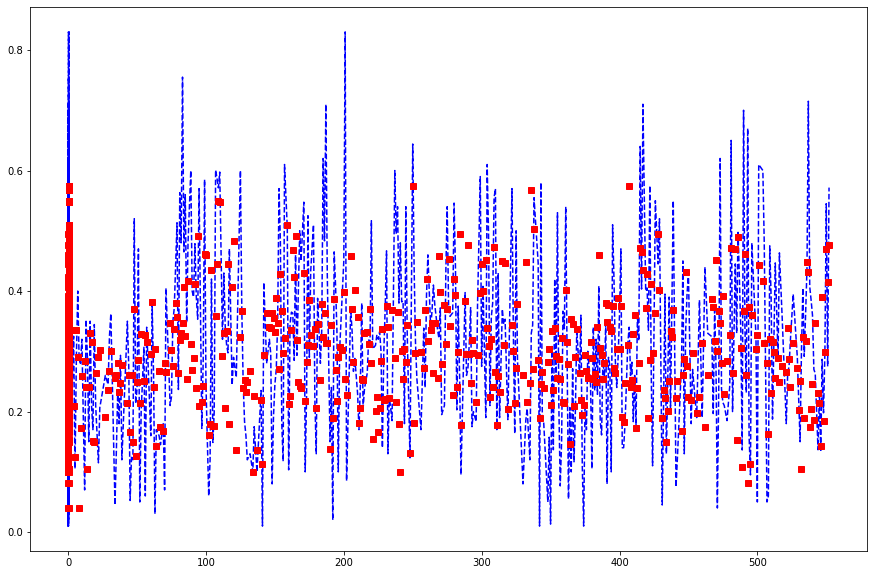

In [7]:
plt.figure(figsize=(15, 10))
plt.plot(df, df.int_corr_ok, "b--", df, df.int_corr_nok, "rs")
plt.show()

#### **Question 3**

> - In terms of getting a second date, is it better to be someone's first speed date of the night or their last?<br>

*Observation of the variable **order**:*

> - order: the number of date that night when met partner<br>

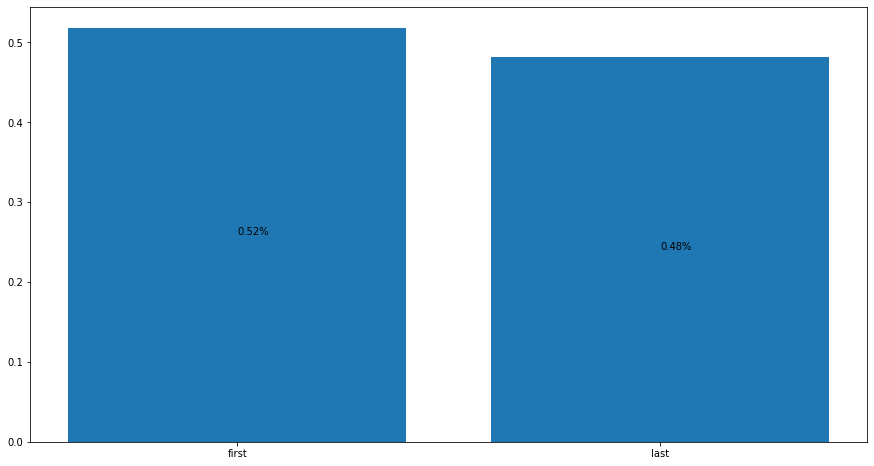

In [9]:
# normalisation = (x - xmin) / (xmax - x)
# standardisation = (x - mean) / std

df = pd.DataFrame(columns=["iid", "order", "match", "norm"])

for i in range(len(dataset["iid"].unique())):
    df_norm = dataset[["iid", "order", "match"]]
    
    try:
        df_norm = df_norm.loc[df_norm["iid"] == i+1]
        xmin = df_norm["order"].min()
        xmax = df_norm["order"].max()
        df_norm["norm"] = df_norm.apply(lambda x: ((x["order"] - xmin) / (xmax - xmin)), axis=1)
        df = pd.concat([df, df_norm], ignore_index=True, axis=0)
    except:
        pass

df = df.loc[df["match"] == 1]
df = df.loc[(df["norm"] == 1) | (df["norm"] == 0), :]
df["percent"] = df["norm"].apply(lambda x: "first" if x == 0
                                                   else "last" if x == 1
                                                   else "nothing")

first = df["percent"].value_counts()["first"] / len(df)
last = df["percent"].value_counts()["last"] / len(df)

def percent(liste, graph):
    i = 0
    for p in graph:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        plt.text(x+width/2, y+height/2, str(round(liste[i], 2))+"%")
        i += 1

plt.figure(figsize=(15, 8))
graph = plt.bar(["first", "last"], [first, last])
percent([first, last], graph)
plt.show()